Kali ini akan dilakukan inversi berbobot untuk menentukan titik hiposenter berdasarkan waktu tiba yang diterima dari empat stasiun.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from numpy.linalg import inv

In [ ]:
# Penentuan Hiposenter
x0 = 10
z0 = 10
t0 = 0

In [ ]:
#Penentuan posisi stasiun
x = [0, 10, 12, 14]
z = [0,  5, 12, 16]
n = len(x)

#Kecepatan Gelombang Vp
v = 5

In [ ]:
#Menghitung Waktu Tempuh Gelombang 
t = []
for i in range (n):
    t.append(((1/v) * np.sqrt((z[i]- z0)**2 + (x[i] - x0)**2 )))

In [ ]:
#Tebakan awal posisi hiposenter
M = [10, 15]
init_position = copy.deepcopy(M)

In [ ]:
xhipo = [init_position[0]]
yhipo = [init_position[1]]
RMS_ERROR = []

# Melakukan Inversi Tanpa menggunakan Pembobotan Faktor
for niter in range(100):

    gm = []
    dgm_dm1 = []
    dgm_dm2 = []
    for i in range(n):
        gm.append(t0 + (1 / v) * (np.sqrt((x[i] - M[0]) ** 2 + (z[i] - M[1]) ** 2)))
        dgm_dm1.append((1 / v) * (-1 * (x[i] - M[0])) / (np.sqrt((z[i] - M[1]) ** 2 + (x[i] - M[0]) ** 2)))
        dgm_dm2.append((1 / v) * (-1 * (z[i] - M[1])) / (np.sqrt((z[i] - M[1]) ** 2 + (x[i] - M[0]) ** 2)))

    J = np.zeros((n, 2))
    for i in range(n):
        J[i][0] = dgm_dm1[i]
        J[i][1] = dgm_dm2[i]

    Mo = copy.deepcopy(M)

    # Menambahkan model pertubarsi dari inversi ke Mo
    Mo = np.reshape(Mo,(2,1))
    ti = np.reshape(ti,(n,1))
    gm = np.reshape(gm,(n,1))

    Model = np.mat(Mo) + np.mat(inv(np.mat(J.transpose())*np.mat(J))) * np.mat(J.transpose())* (np.mat(ti) - np.mat(gm))
    M = [Model[0][0], Model[1][0]]
    Data = Model.tolist()

    xhipo.append(Data[0][0])
    yhipo.append(Data[1][0])

    # Melakukan perhitungan RMS Error
    dt = ti - gm
    RMS_ERROR.append(np.sqrt(np.average(dt**2)))

In [ ]:
#Menghitung estimasi model
inv_without_weighted = []
for i in range(len(x)):
    inv_without_weighted.append((1 / v) * (-1 * (x[i] - xhipo[-1]) / (np.sqrt((z[i] - yhipo[-1]) ** 2 + (x[i] - xhipo[-1]) ** 2))))

#menghitung misfit dengan dan tanpa misfit
E = np.mat(np.transpose(np.reshape(inv_without_weighted,(n,1)) - ti)) * np.mat(np.reshape(inv_without_weighted,(n,1)) - ti)

print('Misfit : ', E)

Misfit :  [[11.74560018]]


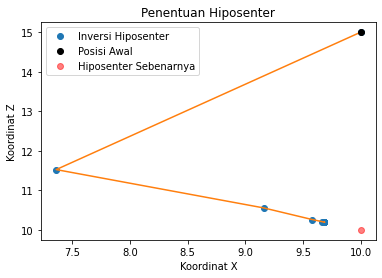

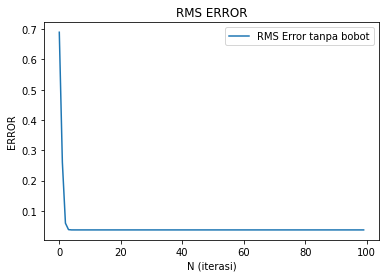

In [ ]:
plt.plot(xhipo , yhipo ,'o', label = 'Inversi Hiposenter')
plt.plot(xhipo , yhipo)
plt.plot(init_position[0], init_position[1], 'o', label = 'Posisi Awal', color ='black')
plt.plot(x0, z0, 'o',alpha = 0.5, color = 'red', label='Hiposenter Sebenarnya')
plt.title('Penentuan Hiposenter')
plt.xlabel('Koordinat X')
plt.ylabel('Koordinat Z')
plt.legend()
plt.show()

plt.plot(RMS_ERROR,label='RMS Error tanpa bobot')
plt.title('RMS ERROR')
plt.xlabel('N (iterasi)')
plt.ylabel('ERROR')
plt.legend()
plt.show()